# Description of the project

You are an analyst for a large online store. Together with the marketing department, you have prepared a list of hypotheses for increasing revenue.
Prioritize your hypotheses, run an A/B test, and analyze the results.

In [1]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt
import seaborn as sns

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Read
hypothesis = pd.read_csv('hypothesis.csv', index_col=0)
pd.set_option('display.max_colwidth', -1)
hypothesis

C:\Users\chern\AppData\Local\Temp\ipykernel_20188\3558550561.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

## Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [5]:
# Let's add an ICE column to prioritize hypotheses
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']) 
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


## Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [6]:
# Add a RICE column to prioritize hypotheses
hypothesis['RICE'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'])
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [7]:
cm = sns.light_palette("blue", as_cmap=True)

s = hypothesis.style.background_gradient(cmap=cm)
s

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.000000,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.000000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.000000,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.000000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.000000,16.000000


## Indicate how the prioritization of hypotheses changes when using RICE instead of ICE. Explain why this happened.

When calculated using the ICE framework, the hypothesis with the highest indicator is number 9 “Launch a promotion that gives a discount on a product on a birthday” and hypothesis number 1 “Add two new channels for attracting traffic, which will attract 30% more users” - since they have the highest Impact and Confidence parameters. That is, when evaluating these hypotheses, it is assumed that these changes will greatly affect the users covered (9/10 for hypothesis 9 and 10/10 for hypothesis 1), and also that there is confidence in the estimates of other parameters based on perhaps competitor experience or previous experience (9/10 for hypothesis 9 and 8/10 for hypothesis 1). Also, the results were high, since the Effort parameter is the average among all hypotheses, that is, testing the hypothesis will most likely require development, which will take some time and it will be necessary to involve developers in assessing the amount of work.
When evaluating hypotheses using the RICE framework, it turned out that the hypothesis with the highest indicator was hypothesis 8 “Add a subscription form to all main pages to collect a customer base for email newsletters” (while when evaluating ICE it was in 3rd place ). This can be explained by the influence of the Reach indicator, which, according to the formula, is in the numerator and which means the reach of users. This indicator is 10 and means that all users will have a subscription form added to the main pages in order to build a customer base. While the “leaders” in the ICE framework have minimal Reach indicators (1 and 3, respectively). Not all users will be covered in the hypothesis testing process.

In [8]:
# Read
orders = pd.read_csv('orders1.csv', index_col=0)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
# Duplicates
orders.duplicated().sum()

0

In [11]:
visitors = pd.read_csv('visitors.csv', index_col=0)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
# Duplicates
visitors.duplicated().sum()

0

In [13]:
orders.groupby('group').agg({'visitorId':'nunique'})

,visitorId
group,
A,503
B,586


In [14]:
groupA = orders.query('group == "A"').reset_index()
groupB = orders.query('group == "B"').reset_index()

In [15]:
s1 = pd.merge(groupA, groupB, how='inner', on=['visitorId'])
print(s1['visitorId'].unique().shape[0])

58


In [16]:
print('Number of users who are in two testing groups: ', s1['visitorId'].unique().shape[0])

Number of users who are in two testing groups:  58


In this testing, it turned out that we have users who are present in both groups. We cannot say exactly why they formed, but we can assume that these users are test users. That is, when starting a test, a person transferred users from one group to another.
It is also worth noting that the groups are distributed somewhat unevenly, which may affect the test results since the groups should be equal.

In [17]:
# Let's find the total revenue by day for both testing groups
revenue_group = (
    orders.drop(['transactionId', 'visitorId'], axis=1)
    .groupby(['group', 'date'], as_index=False)
    .agg({'revenue': 'sum'})
)

revenue_group

,group,date,revenue
0,A,2019-08-01,148579
1,A,2019-08-02,93822
2,A,2019-08-03,112473
3,A,2019-08-04,70825
4,A,2019-08-05,124218
...,...,...,...
57,B,2019-08-27,147677
58,B,2019-08-28,96008
59,B,2019-08-29,231130
60,B,2019-08-30,215233


In [18]:
revenue_A = revenue_group.query('group == "A"')
revenue_B = revenue_group.query('group == "B"')

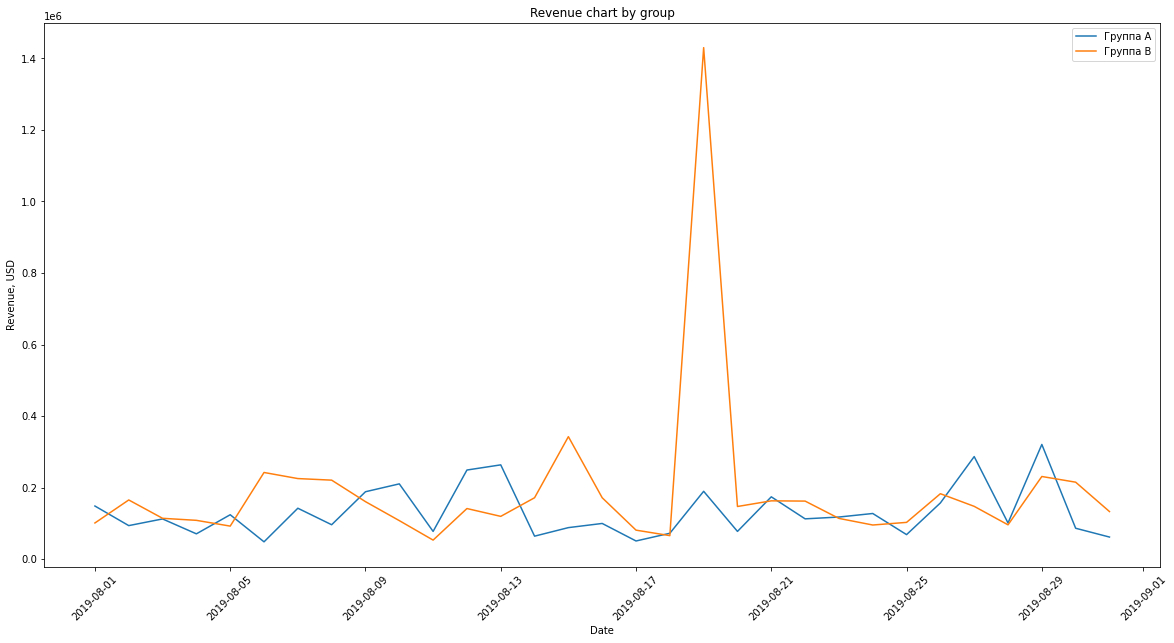

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(revenue_A['date'], revenue_A['revenue'], label='Группа A')
plt.plot(revenue_B['date'], revenue_B['revenue'], label='Группа B')
plt.title('Revenue chart by group')
plt.ylabel('Revenue, USD')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

According to the constructed graph of revenue by groups by day, we cannot make an exact conclusion which segment is better. Results vary greatly from day to day. There are also strong outliers on 08/19/2021. The test is worth continuing.

In [20]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']).sort_values(by=['date', 'group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


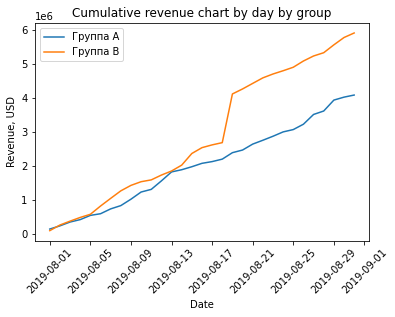

<Figure size 2160x1080 with 0 Axes>

In [21]:
# Build graphs of cumulative revenue by day by group.
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.legend()
plt.title("Cumulative revenue chart by day by group")
plt.ylabel('Revenue, USD')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.figure(figsize=(30, 15))
plt.show()

In the first half of testing, segment B took the lead and led for the rest of the test, with a sharp increase in the middle of the test. Anomalous outliers greatly affect the graph and indicators, it is necessary to clean the data in the final analysis.

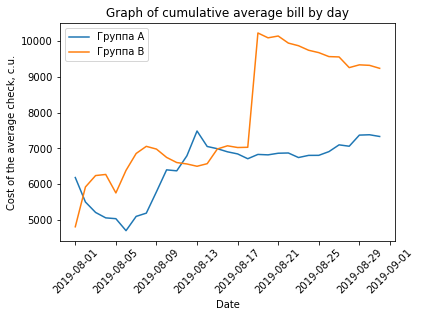

<Figure size 1440x720 with 0 Axes>

In [22]:
# For each group, plot the cumulative average bill by day.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа B')
plt.legend()
plt.title("Graph of cumulative average bill by day")
plt.ylabel('Cost of the average check, c.u.')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

On the graph of the cumulative average bill, there is a fluctuation in the first half of the graph, but then there is a sharp rise in segment B. It is too early to make a decision on this metric; it is worth removing outliers that greatly distort the graph.

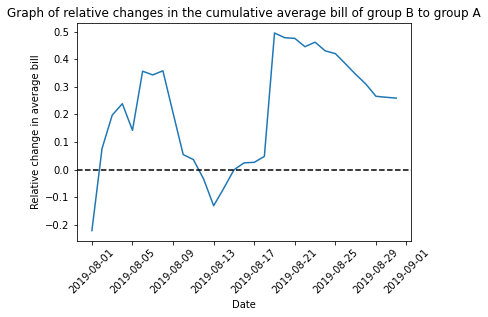

<Figure size 1440x720 with 0 Axes>

In [23]:
# Plot a graph of the relative change in the cumulative average check of group B to group A. Draw conclusions and assumptions.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# build the ratio of average checks
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# add X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Graph of relative changes in the cumulative average bill of group B to group A")
plt.ylabel('Relative change in average bill')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

The graph shows fluctuations in the first half, as segments A and B alternately take the lead, but then there is a sharp rise due to emissions of segment B and the graph reaches its peak.

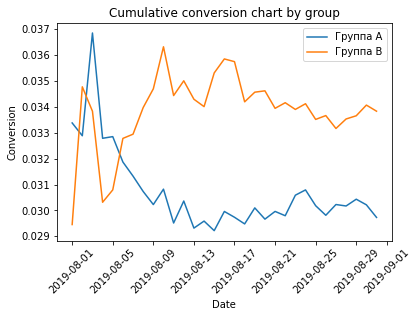

<Figure size 1440x720 with 0 Axes>

In [24]:
# Plot the cumulative conversion by group. Draw conclusions and assumptions.
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.legend()
plt.title("Cumulative conversion chart by group")
plt.ylabel('Conversion')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

In segment A, at the beginning of testing, a peak value of cumulative conversion is observed, after which there is a sharp drop. While segment B takes the lead at the beginning of testing and remains so until the end of the test.

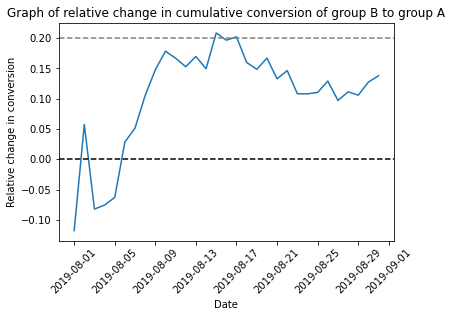

<Figure size 1440x720 with 0 Axes>

In [25]:
# Plot the relative change in cumulative conversion of group B to group A. Draw conclusions and assumptions.
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title("Graph of relative change in cumulative conversion of group B to group A")
plt.ylabel('Relative change in conversion')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

After the segment of group B has become a leader in conversion, it becomes better and better and reaches an increase of 20% relative to group A.

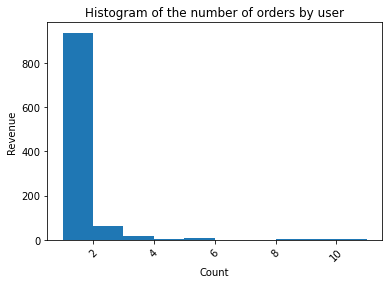

<Figure size 1440x720 with 0 Axes>

In [26]:
# Plot a scatter plot of the number of orders by user. Draw conclusions and assumptions.
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']
plt.hist(ordersByUsers['orders'])
plt.title("Histogram of the number of orders by user")
plt.ylabel('Revenue')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

Most users made 1 order. However, it is unclear how many users ordered 2, 3 or more orders. Let's build a scatter plot.

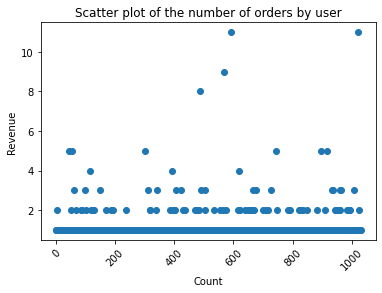

<Figure size 1440x720 with 0 Axes>

In [27]:
# Plot a scatter plot of the number of orders by user.
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Scatter plot of the number of orders by user")
plt.ylabel('Revenue')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

The graph shows that there are very few users who ordered more than 2 times. Let's calculate the percentiles to determine whether this number is large or not.

In [28]:
# Calculate the 95th and 99th percentiles of the number of orders per user.
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


No more than 1% of users make more than 3 orders. And about 5% make more than 2 orders.

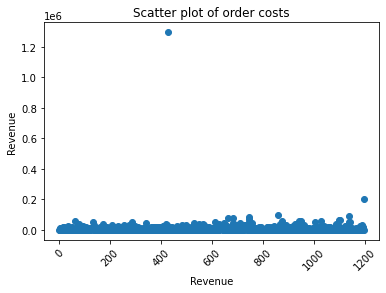

<Figure size 1440x720 with 0 Axes>

In [29]:
# Plot a scatter plot of order costs.
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("Scatter plot of order costs")
plt.ylabel('Revenue')
plt.xlabel('Revenue')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

The graph shows that on average all orders are in the range of up to 200,000 USD, but there are also outliers of 1,200,000 USD.

In [30]:
# Calculate the 95th and 99th percentiles of order values.
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


No more than 5% of users place an order in the amount of 28,000 USD. And about 1% make orders worth more than $58,233.
We consider as anomalous users those who have made 4 orders or more, or made an order in excess of 50,000 rubles. This way we will remove 1% of users with the largest number of orders and from 1% to 5% of orders with the highest value.

In [31]:
# Let's count the daily number of users for group A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
# Let's count the daily number of users for group B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
# Let's calculate the daily number of orders and revenue for group A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# Let's calculate the daily number of orders and revenue for group B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# Let's group into a common table the tables for daily orders by group, revenue by group, and number of users
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


1. Null hypothesis: conversions between groups according to “raw” data are equal
2. Reverse hypothesis: conversions between groups based on raw data differ

In [32]:
# Calculate the statistical significance of differences in conversion between groups using raw data.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
 
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(
         0, 
         index=np.arange(
             data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
         ), 
         name='orders'
     )
    ], 
    axis=0
)
sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(
         0, 
         index=np.arange(
             data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
         ), 
         name='orders'
     )
    ], 
    axis=0
)
 
print("p-Value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("The relative increase in the conversion of group B to group A is: {0:.2%}".format(((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)))

p-Value: 0.01679
The relative increase in the conversion of group B to group A is: 13.81%


The P-value is significantly less than 0.05, therefore we reject the null hypothesis. Analysis of the raw data reports that there are statistically significant differences in conversion between groups. The relative increase in the conversion of group B to the conversion of group A is 13.81%.

1. Null hypothesis: the average check between groups based on “raw” data is equal
2. Reverse hypothesis: average check indicators between groups according to “raw” data differ

In [33]:
# Calculate the statistical significance of differences in the average order bill between groups based on “raw” data.
print('p-Value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('The relative difference between the average check of group B and the average check of group A is: {0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-Value: 0.729
The relative difference between the average check of group B and the average check of group A is: 25.87%


P-value is significantly greater than 0.05 - the null hypothesis must be accepted. There are no statistically significant differences in average checks between groups. At the same time, the relative differences between the checks are 25.87%

1. Null hypothesis: conversions between groups based on “cleaned” data are equal
2. Reverse hypothesis: conversions between groups according to “cleaned” data differ

In [34]:
# Calculate the statistical significance of differences in conversion between groups using “cleaned” data.
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
18      199603092
23      237748145
1137    759473111
949     887908475
Name: visitorId, dtype: int64

We consider as anomalous users those who have made 4 orders or more, or made an order in excess of 50,000 rubles. This way we will remove 1% of users with the largest number of orders and from 1% to 5% of orders with the highest value.

In [35]:
# Calculate the statistical significance of differences in conversion between groups using “cleaned” data.
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-Value for "cleaned data": {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('The relative increase according to “cleaned data” in the conversion of group B to group A is: {0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-Value for "cleaned data": 0.01144
The relative increase according to “cleaned data” in the conversion of group B to group A is: 15.83%


As with the raw data, there were no statistically significant differences in conversions between groups. The relative increase according to “cleaned data” in the conversion of group B to group A is: 15.83%

In [36]:
# Calculate the statistical significance of differences in the average order bill between groups using “cleaned” data.
print(
    'p-Value from "cleaned data": {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        alternative = 'two-sided')[1]
    )
)

print(
    "Relative increase in the average order receipt between groups according to “cleaned” data: {0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-Value from "cleaned data": 0.819
Relative increase in the average order receipt between groups according to “cleaned” data: 2.36%


P-value is significantly greater than 0.05 - the null hypothesis must be accepted. There are no statistically significant differences in average checks between groups. At the same time, the relative differences between the checks are 2.36%.

Cumulative metrics are essentially stabilizing, showing improvements in some metrics and parity in others. For this reason, it is worth stopping the test and recording the victory of group B over group A.

# Summary

Based on the results of the hypothesis prioritization stage, it turned out that when evaluating hypotheses using the RICE framework, the hypothesis with the highest indicator was hypothesis 8 “Add a subscription form to all main pages to collect a customer base for email newsletters.” When you color the table with the maximum scores by column, you can clearly see that the row with this hypothesis achieved the highest scores.
Based on the results of the second part of the analysis, it can be noted that there are abnormally large outliers in the data; they needed to be cleaned for further testing of the hypothesis. We found out that such anomalous data would include orders exceeding 50,000 USD. and with the number of orders more than 3.
According to the results of the A/B test on the cleaned data, it turned out that there were no statistically significant differences between the conversions between the groups. The relative increase according to “cleaned data” in the conversion of group B to group A is: 15.83%. At the same time, there are no statistically significant differences between the indicators for average checks between the groups. At the same time, the relative differences between the checks are 2.36%.
At the end of the analysis, it was concluded that it was worth stopping the test and recording the victory of group B over group A.